# Import Library
Pada tahap ini dilakukan import library untuk membaca data, dan preprocessing data.

In [795]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Analisis Data
Pada tahap ini dilakukan import data gaji untuk pekerja dibidang data science

In [796]:
data_frame=pd.read_csv('/content/ds_salaries.csv')
data_frame

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Memilih Fitur/Atribut
pada tahap ini dilakukan pemilihan atribut/fitur yang bisa digunakan untuk diterapkan pada algoritma machine learning. Pada tahap ini atribut dipilih yaitu : 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'

In [797]:
data_frame=data_frame[['work_year','experience_level','employment_type','job_title','salary_in_usd','employee_residence','remote_ratio','company_location','company_size']]
data_frame

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


# Analisis Data
pada tahap ini dilakukan analisis data untuk melihat apakah ada nilai yang kosong atau tidak, kemudian melihat deskripsi dari distribusi dataset, dan melihat tipe data pada setiap atribut.

In [798]:
data_frame.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [799]:
data_frame.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


In [800]:
data_frame.describe(include='O')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,607,607,607,607,607,607
unique,4,4,50,57,50,3
top,SE,FT,Data Scientist,US,US,M
freq,280,588,143,332,355,326


In [801]:
data_frame.value_counts()

work_year  experience_level  employment_type  job_title           salary_in_usd  employee_residence  remote_ratio  company_location  company_size
2022       SE                FT               Data Scientist      140000         US                  100           US                M               6
                                              Data Analyst        90320          US                  100           US                M               5
                                              Data Scientist      210000         US                  100           US                M               4
                                              Data Analyst        112900         US                  100           US                M               4
                                              Data Scientist      123000         US                  100           US                M               3
                                                                                                   

In [802]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [803]:
data_frame.corr()

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


# Membagi Data
Pada tahap ini data dibagi menjadi 2 bagian yaitu data test, dan data train. Kemudian pada tahap ini beberapa data yang bertipe kategori dilakukan proses one-hot encoding.

In [804]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [805]:
data_frame.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [806]:
data_frame=pd.get_dummies(data_frame,columns=['work_year','experience_level','employment_type','job_title','employee_residence','company_location','company_size'])
feature=data_frame.drop(columns='salary_in_usd')
feature

,remote_ratio,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,50,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
603,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
604,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
605,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [807]:
label=data_frame['salary_in_usd']
label=label/1000
label

0       79.833
1      260.000
2      109.024
3       20.000
4      150.000
        ...   
602    154.000
603    126.000
604    129.000
605    150.000
606    200.000
Name: salary_in_usd, Length: 607, dtype: float64

In [808]:
data=pd.DataFrame(feature)
data

,remote_ratio,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,50,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
603,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
604,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
605,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [809]:
train_x, test_x, train_y, test_y=train_test_split(feature,label, test_size=0.1)

In [810]:
train_x

,remote_ratio,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
438,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
411,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
179,100,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
297,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
129,50,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,100,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
524,100,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
504,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
305,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [811]:
train_y

438    189.650
411     45.807
179      5.679
297     84.900
129     40.570
        ...   
96      12.000
524    135.000
504    115.000
305     99.000
161     85.000
Name: salary_in_usd, Length: 546, dtype: float64

# Penerapan Algoritma
Pada tahap ini dilakukan training terhadap data train yang telah dibagi. Kemudian memilih algoritma linear regression dengan melakukan import library bawaan dari sklearn.

In [812]:
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [813]:
clf =  make_pipeline(StandardScaler(),PoissonRegressor()).fit(train_x, train_y)

In [814]:
test_x

,remote_ratio,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
142,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
146,50,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
205,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
540,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
23,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
566,100,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
34,50,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
433,100,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Prediksi
Pada tahap ini dilakukan prediksi data test yang sudah dibagi terhadap model yang telah ditraining menggunakan data train.

In [815]:
predict_y=clf.predict(test_x)

In [816]:
predict_y

array([146.11878599,  79.98347008,  12.52975748, 114.85746995,
       135.97031274,  68.17707989, 153.18755859, 134.64441293,
        89.45399102, 160.64980763,  47.37330263, 160.64980763,
        75.01224978, 196.17826632, 150.46244036,  74.08262529,
       122.95508755, 150.46244036,  86.12331705, 150.46244036,
        35.43384736, 126.33347998,  72.90538251, 126.33347998,
        45.46095268,  65.14108913,  24.37413093, 168.43715924,
        77.52487484, 118.3222313 , 150.46244036, 130.08824854,
       287.41103641, 114.85746995,  77.98653922,  25.78614012,
        55.66203354,  45.40982077,  77.98653922, 130.75924799,
        30.51719796, 114.85746995, 115.26780423,  90.81827242,
        67.21340747, 102.61224242, 202.9488319 , 142.91783757,
       124.56843718,  65.61002968,  94.19757743,  19.49800909,
        96.06365954,  82.39675111,  47.73149153, 379.39136472,
       176.69766013, 114.85746995,  52.04386481,  46.41807927,
       145.50631083])

In [817]:
test_y=np.array(test_y)
test_y

array([150.   ,  62.649,  12.901, 115.934,  98.   ,  70.139, 183.6  ,
       200.   ,  71.444, 140.   ,  35.735, 180.   ,  59.303, 213.12 ,
       100.   ,  37.3  , 205.3  , 128.875,  45.76 , 126.   ,  43.966,
       130.   ,  28.369, 141.3  ,  47.282,  56.738,   2.859, 240.   ,
        25.532,  99.1  , 156.6  , 130.   , 195.   , 109.28 , 117.789,
        10.   ,  62.726,  88.654,  52.351,  37.236,  33.808, 135.   ,
       200.   ,  80.   ,  50.18 ,  61.896, 103.   , 220.11 , 150.   ,
       160.   ,  78.526,  28.609,  78.791,  82.528,  35.59 , 416.   ,
       137.141, 170.   ,  46.759,  76.94 , 113.   ])

# Perbadingan Prediksi
Pada tahap ini dilakukan perbadingan nilai terhadap label yang sebenarnya dengan label prediksi yang telah dilakukan sebelumnya.

In [818]:
column_fit=pd.DataFrame({'Index':range(1, len(test_y) + 1),'Real Label':test_y,'Predict Label':predict_y})
column_fit

,Index,Real Label,Predict Label
0,1,150.000,146.118786
1,2,62.649,79.983470
2,3,12.901,12.529757
3,4,115.934,114.857470
4,5,98.000,135.970313
...,...,...,...
56,57,137.141,176.697660
57,58,170.000,114.857470
58,59,46.759,52.043865
59,60,76.940,46.418079


# Evaluasi
Pada tahap ini dilakukan evaluasi terhadap hasil prediksi pada data test. Tujuan dari evaluasi ini yaitu melihat seberapa jauh prebedaan nilai prediksi terhadap nilai sebenarnya.

In [819]:
clf.score(test_x, test_y)

0.6829858880013848

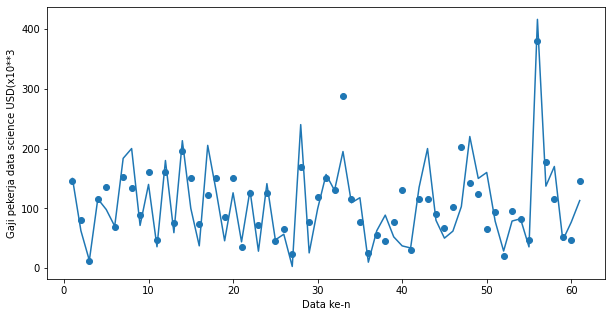

In [826]:
plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.scatter(column_fit['Index'], predict_y)
ax.plot(column_fit['Index'], test_y)
ax.set_xlabel('Data ke-n')
ax.set_ylabel('Gaji pekerja data science USD(x10**3')
plt.show()

In [821]:
from sklearn import metrics

In [822]:
print(metrics.mean_absolute_error(test_y,predict_y))

29.832781583309743


In [823]:
print(metrics.mean_squared_error(test_y,predict_y))

1619.9852333324882


In [824]:
print(np.sqrt(metrics.mean_squared_error(test_y,predict_y)))

40.2490401541762
